In [234]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

0. Set Hyperparamters

In [451]:
train_ratio = 0.8
validation_ratio = 0.2
epochs = 1000
batch_size = 1024

1. Import Data

In [452]:
# 1. Import data
NY_data = pd.read_csv("data/NY_data.csv")

# 2. Split data into x and y values
y = NY_data['price']
X = NY_data.drop(columns=['price'])

# 4. Split data into Train vs. Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio, random_state=42)

In [453]:
DNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(1)
])

early_stop = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

DNN.compile(loss='mse', optimizer='adam')

2. Model Initilization

In [454]:
history = DNN.fit(X_train, y_train, epochs=epochs, verbose=1, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/1000
32/32 [==============================] - 1s 14ms/step - loss: 4137097625600.0000 - val_loss: 3730406899712.0000
Epoch 2/1000
32/32 [==============================] - 0s 9ms/step - loss: 4137021079552.0000 - val_loss: 3730394316800.0000
Epoch 3/1000
32/32 [==============================] - 0s 9ms/step - loss: 4136845705216.0000 - val_loss: 3730367053824.0000
Epoch 4/1000
32/32 [==============================] - 0s 8ms/step - loss: 4136530083840.0000 - val_loss: 3730297323520.0000
Epoch 5/1000
32/32 [==============================] - 0s 9ms/step - loss: 4136045903872.0000 - val_loss: 3730162319360.0000
Epoch 6/1000
32/32 [==============================] - 0s 9ms/step - loss: 4135285686272.0000 - val_loss: 3729983799296.0000
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 4134226100224.0000 - val_loss: 3729672110080.0000
Epoch 8/1000
32/32 [==============================] - 0s 9ms/step - loss: 4132916690944.0000 - val_loss: 3729129472000.0000
Epoch 9

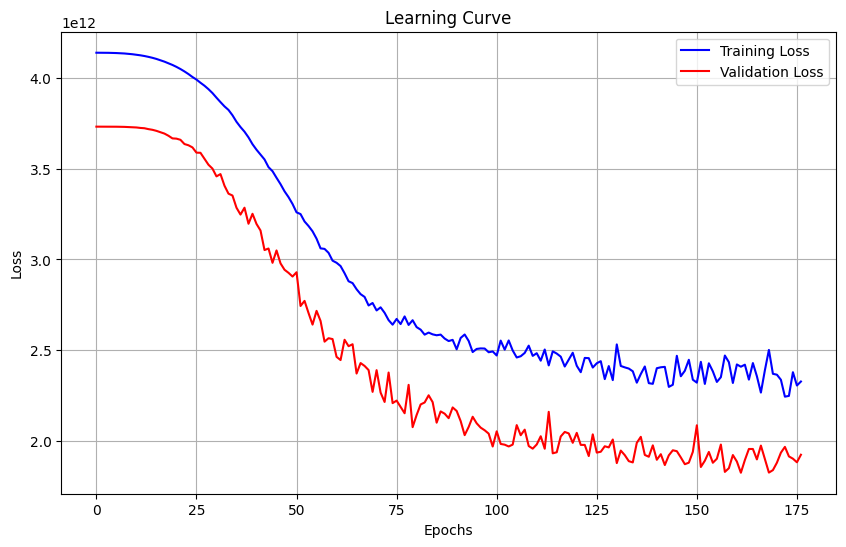

In [455]:
import matplotlib.pyplot as plt

# Extract the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [456]:
loss = DNN.evaluate(X_test, y_test)
print("Test Loss:", loss)

318/318 [==============================] - 0s 685us/step - loss: 1533964189696.0000
Test Loss: 1533964189696.0


In [457]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = DNN.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

318/318 [==============================] - 0s 538us/step
Mean Absolute Error: 317077.83893241355
Mean Squared Error: 1533964204050.7754
Root Mean Squared Error: 1238533.0855696893
R-squared: 0.5007794992787835


In [458]:
predictions = DNN.predict([[3.0,1.0,60.0,12022.0,1176.0], [3.0,2.0,2.02,12521.0,1600.0], [4.0,4.0,37.0,12062.0,4000.0]]);
print("Expected Prices: 175000.0, 425000, 1300000")
print("Predicted Prices: {}, {}, {}".format(predictions[0][0], predictions[1][0], predictions[2][0]))

1/1 [==============================] - 0s 74ms/step
Expected Prices: 175000.0, 425000, 1300000
Predicted Prices: 272190.5, 224390.828125, 1618584.0
